# Spotify. Popularity prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
%run plot_decision_regions_script.py

## Data wrangling

In [3]:
df = pd.read_csv('SpotifyFeatures.csv', encoding = 'utf-8')
df.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [4]:
df['genre'].unique()

array(['Movie', 'R&B', 'A Capella', 'Alternative', 'Country', 'Dance',
       'Electronic', 'Anime', 'Folk', 'Blues', 'Opera', 'Hip-Hop',
       "Children's Music", 'Children’s Music', 'Rap', 'Indie',
       'Classical', 'Pop', 'Reggae', 'Reggaeton', 'Jazz', 'Rock', 'Ska',
       'Comedy', 'Soul', 'Soundtrack', 'World'], dtype=object)

In [5]:
df['time_signature'].unique()

array(['4/4', '5/4', '3/4', '1/4', '0/4'], dtype=object)

In [6]:
df.count()

genre               232725
artist_name         232725
track_name          232725
track_id            232725
popularity          232725
acousticness        232725
danceability        232725
duration_ms         232725
energy              232725
instrumentalness    232725
key                 232725
liveness            232725
loudness            232725
mode                232725
speechiness         232725
tempo               232725
time_signature      232725
valence             232725
dtype: int64

In [7]:
len(df.isnull())

232725

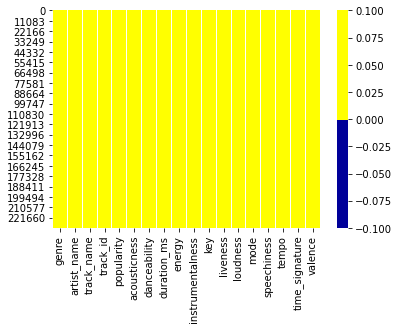

In [8]:
import seaborn as sns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(df.isnull(), cmap=sns.color_palette(colours))

In [9]:
df['popularity'].mean()

41.12750241701579

In [10]:
#Get a label, depending on the popularity of the song
frontier = df['popularity'].mean()
df['label'] = df['popularity'].apply(lambda x: 1 if x > frontier else 0)
df.tail()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,label
232720,Soul,Slave,Son Of Slide,2XGLdVl7lGeq8ksM6Al7jT,39,0.00384,0.687,326240,0.714,0.544000,D,0.0845,-10.626,Major,0.0316,115.542,4/4,0.962,0
232721,Soul,Jr Thomas & The Volcanos,Burning Fire,1qWZdkBl4UVPj9lK6HuuFM,38,0.03290,0.785,282447,0.683,0.000880,E,0.2370,-6.944,Minor,0.0337,113.830,4/4,0.969,0
232722,Soul,Muddy Waters,(I'm Your) Hoochie Coochie Man,2ziWXUmQLrXTiYjCg2fZ2t,47,0.90100,0.517,166960,0.419,0.000000,D,0.0945,-8.282,Major,0.1480,84.135,4/4,0.813,1
232723,Soul,R.LUM.R,With My Words,6EFsue2YbIG4Qkq8Zr9Rir,44,0.26200,0.745,222442,0.704,0.000000,A,0.3330,-7.137,Major,0.1460,100.031,4/4,0.489,1
232724,Soul,Mint Condition,You Don't Have To Hurt No More,34XO9RwPMKjbvRry54QzWn,35,0.09730,0.758,323027,0.470,0.000049,G#,0.0836,-6.708,Minor,0.0287,113.897,4/4,0.479,0


In [11]:
len(df[df['label'] == 1])/len(df)

0.5290664947899881

In [12]:
#Get an unbiased set of 500 songs
c1 = df[df['label'] == 1][:250]
c2 = df[df['label'] == 0][:250]
df =c1.append(c2, ignore_index=True)
len(df), len(df[df['label'] == 1])/len(df)

(500, 0.5)

In [13]:
df.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,label
0,R&B,Mary J. Blige,Be Without You - Kendu Mix,2YegxR5As7BeQuVp2U6pek,65,0.0830,0.724,246333,0.689,0.000000,D,0.3040,-5.922,Minor,0.1350,146.496,4/4,0.6930,1
1,R&B,Rihanna,Desperado,6KFaHC9G178beAp7P0Vi5S,63,0.3230,0.685,186467,0.610,0.000000,C,0.1020,-5.221,Minor,0.0439,94.384,3/4,0.3230,1
2,R&B,Yung Bleu,Ice On My Baby (feat. Kevin Gates) - Remix,6muW8cSjJ3rusKJ0vH5olw,62,0.0675,0.762,199520,0.520,0.000004,F,0.1140,-5.237,Minor,0.0959,75.047,4/4,0.0862,1
3,R&B,Surfaces,Heaven Falls / Fall on Me,7yHqOZfsXYlicyoMt62yC6,61,0.3600,0.563,240597,0.366,0.002430,B,0.0955,-6.896,Minor,0.1210,85.352,4/4,0.7680,1
4,R&B,Olivia O'Brien,Love Myself,4XzgjxGKqULifVf7mnDIQK,68,0.5960,0.653,213947,0.621,0.000000,B,0.0811,-5.721,Minor,0.0409,100.006,4/4,0.4660,1


In [14]:
df['mode'] = df['mode'].map({'Minor': 0, 'Major': 1})
df['time_signature'] = df['time_signature'].map({'0/4': 0, '1/4': 1, '3/4': 3, '4/4': 4, '5/4': 5})

In [15]:
df['time_signature'].unique()

array([4, 3, 5, 1], dtype=int64)

In [16]:
popul = df['popularity']
df = df.drop(['artist_name', 'track_name', 'track_id', 'popularity'], axis = 1)

In [17]:
df = df.drop(['genre', 'key'], axis = 1).join(pd.get_dummies(df[['genre', 'key']]))

In [18]:
df.columns

Index(['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'mode', 'speechiness',
       'tempo', 'time_signature', 'valence', 'label', 'genre_A Capella',
       'genre_Alternative', 'genre_Country', 'genre_Movie', 'genre_R&B',
       'key_A', 'key_A#', 'key_B', 'key_C', 'key_C#', 'key_D', 'key_D#',
       'key_E', 'key_F', 'key_F#', 'key_G', 'key_G#'],
      dtype='object')

In [19]:
df.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,mode,speechiness,tempo,...,key_B,key_C,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#
0,0.0830,0.724,246333,0.689,0.000000,0.3040,-5.922,0,0.1350,146.496,...,0,0,0,1,0,0,0,0,0,0
1,0.3230,0.685,186467,0.610,0.000000,0.1020,-5.221,0,0.0439,94.384,...,0,1,0,0,0,0,0,0,0,0
2,0.0675,0.762,199520,0.520,0.000004,0.1140,-5.237,0,0.0959,75.047,...,0,0,0,0,0,0,1,0,0,0
3,0.3600,0.563,240597,0.366,0.002430,0.0955,-6.896,0,0.1210,85.352,...,1,0,0,0,0,0,0,0,0,0
4,0.5960,0.653,213947,0.621,0.000000,0.0811,-5.721,0,0.0409,100.006,...,1,0,0,0,0,0,0,0,0,0


In [20]:
X = df.drop('label', axis = 1)
y = df['label']

In [21]:
X.columns, y

(Index(['acousticness', 'danceability', 'duration_ms', 'energy',
        'instrumentalness', 'liveness', 'loudness', 'mode', 'speechiness',
        'tempo', 'time_signature', 'valence', 'genre_A Capella',
        'genre_Alternative', 'genre_Country', 'genre_Movie', 'genre_R&B',
        'key_A', 'key_A#', 'key_B', 'key_C', 'key_C#', 'key_D', 'key_D#',
        'key_E', 'key_F', 'key_F#', 'key_G', 'key_G#'],
       dtype='object'),
 0      1
 1      1
 2      1
 3      1
 4      1
       ..
 495    0
 496    0
 497    0
 498    0
 499    0
 Name: label, Length: 500, dtype: int64)

In [22]:
#Split data into train/test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =\
    train_test_split(X, y, test_size = 0.3, random_state = 0, stratify = y)

In [23]:
#Get normalized data
'''
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)
'''

'\nfrom sklearn.preprocessing import MinMaxScaler\n\nmms = MinMaxScaler()\nX_train_norm = mms.fit_transform(X_train)\nX_test_norm = mms.transform(X_test)\n'

In [24]:
#Get standarized data
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [25]:
X_train_std.shape[1]

29

In [26]:
# Get principal components
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

## Logistic regression step by step

In [68]:
from sklearn.linear_model import LogisticRegression


lr = LogisticRegression(penalty = 'l2',               
                        C= 100,
                        solver = 'liblinear')
lr.fit(X_train_pca, y_train)

print('Training accuracy:', lr.score(X_train_pca, y_train))
print('Test accuracy:', lr.score(X_test_pca, y_test))

Training accuracy: 0.9028571428571428
Test accuracy: 0.9


<function matplotlib.pyplot.show(*args, **kw)>

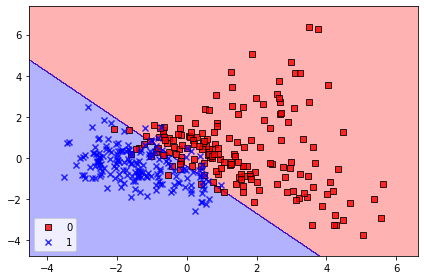

In [69]:
plot_decision_regions(X_train_pca, y_train, lr, 0.02)
plt.legend(loc = 'lower left')
plt.tight_layout()
plt.show

## Same logistic regresion in a pipeline, tuning parameters by grid search and cross validation

In [52]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

pipe_lr = make_pipeline(StandardScaler(),
                        PCA(n_components=6),
                        LogisticRegression(penalty = 'l2',               
                        C= 100,                  
                        solver = 'liblinear')
                       )
pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test)
print('Test accuracy: %.3f' % pipe_lr.score(X_test, y_test))

Test accuracy: 0.967


In [53]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV


pipe_lr = make_pipeline(StandardScaler(),
                        PCA(),
                        LogisticRegression(penalty = 'l2',                           
                        solver = 'liblinear')
                       )

param_grid = {
            'pca__n_components': [2, 4, 6, 8],
            'logisticregression__C': [0.1, 1, 100]
            }
gs = GridSearchCV(estimator = pipe_lr, param_grid = param_grid)
gs = gs.fit(X_train, y_train)

print(gs.best_score_)
print(gs.best_params_)

clf = gs.best_estimator_
clf.fit(X_train, y_train)
print('Test accuracy: %.3f' % clf.score(X_test, y_test))

0.9514285714285716
{'logisticregression__C': 0.1, 'pca__n_components': 8}
Test accuracy: 0.960


In [54]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(estimator = clf,
                        X = X_train_std,
                        y = y_train,
                        cv = 10,
                        n_jobs = 1
                        )
print('CV accuracy scores: %s' % scores)
print('CV accuracy: %.3f +/- %-3f' % (np.mean(scores), np.std(scores)))

CV accuracy scores: [0.94285714 0.97142857 0.91428571 0.88571429 1.         0.97142857
 0.97142857 0.91428571 1.         0.97142857]
CV accuracy: 0.954 +/- 0.036589


In [82]:
#Probabilities to belong to each class for the first 5 songs of the test set
#(standarized)
pipe_lr.predict_proba(X_train_std[:5, :])

array([[9.99999215e-01, 7.84549444e-07],
       [9.99999379e-01, 6.20721822e-07],
       [9.99604387e-01, 3.95612908e-04],
       [3.00495016e-02, 9.69950498e-01],
       [5.80387472e-04, 9.99419613e-01]])

## SVM with 2 Principal Components

In [83]:
from sklearn.svm import SVC

svm = SVC(kernel = 'rbf', random_state = 1, C = 1.0, gamma = 0.1)
svm.fit(X_train_pca, y_train)

print('Training accuracy:', svm.score(X_train_pca, y_train))
print('Test accuracy:', svm.score(X_test_pca, y_test))

Training accuracy: 0.8942857142857142
Test accuracy: 0.9


<function matplotlib.pyplot.show(*args, **kw)>

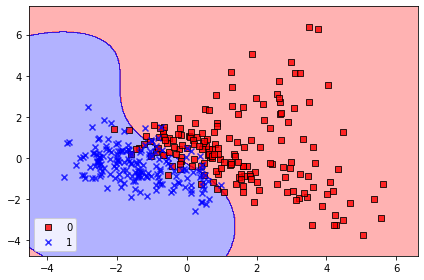

In [84]:
plot_decision_regions(X_train_pca, y_train, svm, 0.02)
plt.legend(loc = 'lower left')
plt.tight_layout()
plt.show

## Ramdom forests

In [85]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(criterion = 'gini',
                               n_estimators = 7,
                               random_state = 1,
                               n_jobs = 2)
forest.fit(X_train_std, y_train)

y_pred = forest.predict(X_test_std)
print('Train accuracy: %.3f' % forest.score(X_train_std, y_train))
print('Test accuracy: %.3f' % forest.score(X_test_std, y_test))

Train accuracy: 0.997
Test accuracy: 1.000


<function matplotlib.pyplot.show(*args, **kw)>

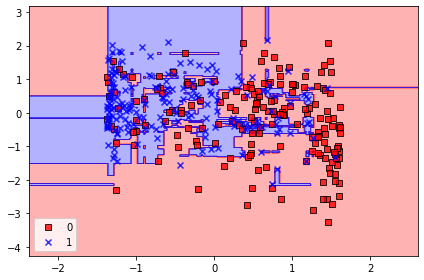

In [86]:
plot_decision_regions(X_train_std, y_train, forest, 0.02)
plt.legend(loc = 'lower left')
plt.tight_layout()
plt.show

## K-nearest neighbors

In [87]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3, p=2, metric = 'minkowski')
knn.fit(X_train_std, y_train)

y_pred = knn.predict(X_test_std)
print('Test accuracy: %.3f' % knn.score(X_test_std, y_test))

Test accuracy: 0.980


<function matplotlib.pyplot.show(*args, **kw)>

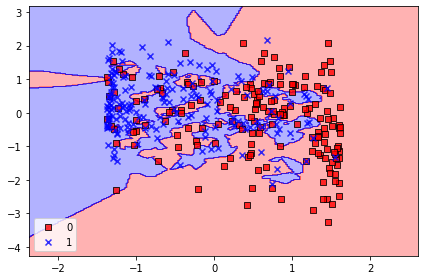

In [88]:
plot_decision_regions(X_train_std, y_train, knn, 0.02)
plt.legend(loc = 'lower left')
plt.tight_layout()
plt.show

## Multilayer perceptron

In [89]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes = 26,
                    random_state = 1, 
                    max_iter = 500)
mlp.fit(X_train_std, y_train)

print('Train accuracy: %.3f' % mlp.score(X_test_std, y_test))
print('Test accuracy: %.3f' % mlp.score(X_test_std, y_test))

Train accuracy: 1.000
Test accuracy: 1.000


<function matplotlib.pyplot.show(*args, **kw)>

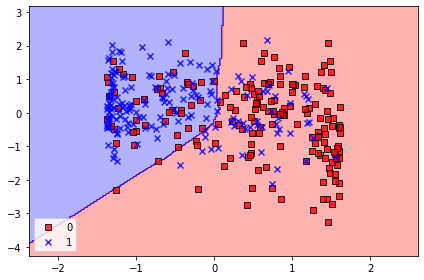

In [90]:
plot_decision_regions(X_train_std, y_train, mlp, 0.02)
plt.legend(loc = 'lower left')
plt.tight_layout()
plt.show

## Linear regression on Principal Component 1

In [93]:
#Get data ready
y = popul
X_std = stdsc.fit_transform(X)
X_pca = pca.fit_transform(X_std)

In [103]:
from sklearn.linear_model import LinearRegression

slr = LinearRegression()

slr.fit(X_pca[:, 0].reshape(-1, 1), y)
print('Slope: %.3f' % slr.coef_[0])
print('Intercept: %.3f' % slr.intercept_)
print('Coeficients:', slr.coef_)
X_pca.shape, len(slr.coef_)

Slope: -10.426
Intercept: 29.870
Coeficients: [-10.42635814]


((500, 2), 1)

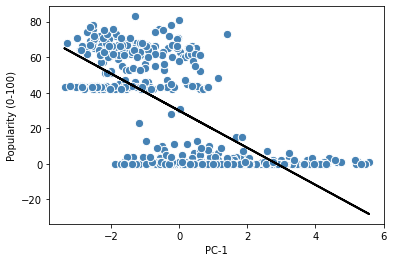

In [104]:
lin_regplot(X_pca[:, 0].reshape(-1, 1), y, slr)
plt.xlabel('PC-1')
plt.ylabel('Popularity (0-100)')
plt.show()

In [56]:
X

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,mode,speechiness,tempo,...,key_B,key_C,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#
0,0.0830,0.724,246333,0.689,0.000000,0.3040,-5.922,0,0.1350,146.496,...,0,0,0,1,0,0,0,0,0,0
1,0.3230,0.685,186467,0.610,0.000000,0.1020,-5.221,0,0.0439,94.384,...,0,1,0,0,0,0,0,0,0,0
2,0.0675,0.762,199520,0.520,0.000004,0.1140,-5.237,0,0.0959,75.047,...,0,0,0,0,0,0,1,0,0,0
3,0.3600,0.563,240597,0.366,0.002430,0.0955,-6.896,0,0.1210,85.352,...,1,0,0,0,0,0,0,0,0,0
4,0.5960,0.653,213947,0.621,0.000000,0.0811,-5.721,0,0.0409,100.006,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.3170,0.585,82018,0.317,0.000001,0.1430,-16.590,0,0.0266,110.070,...,0,0,0,0,0,0,1,0,0,0
496,0.0381,0.799,141240,0.590,0.000008,0.1270,-7.690,1,0.0407,139.898,...,0,0,0,0,0,1,0,0,0,0
497,0.0678,0.746,163413,0.811,0.000000,0.1260,-4.171,0,0.0406,106.355,...,0,0,0,0,0,0,1,0,0,0
498,0.7400,0.739,224200,0.472,0.000000,0.1370,-11.671,1,0.0410,90.306,...,1,0,0,0,0,0,0,0,0,0


## K-means for acousticness, danceability and energy 

In [32]:
from sklearn.preprocessing import StandardScaler

X_kmeans = X[['acousticness', 'danceability' ,'energy']]
#X_kmeans = X.iloc[:, [0, 1, 3]]
#Standarize the data
stdsc = StandardScaler()
X_kmeans_std = stdsc.fit_transform(X_kmeans)

In [33]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters = 3,
           init = 'k-means++',
           n_init = 10,
           max_iter = 300,
           tol = 1e-04,
           random_state = 0)
y_km = km.fit_predict(X_kmeans_std)

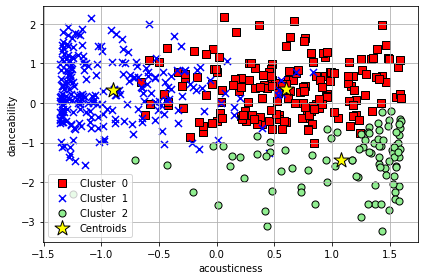

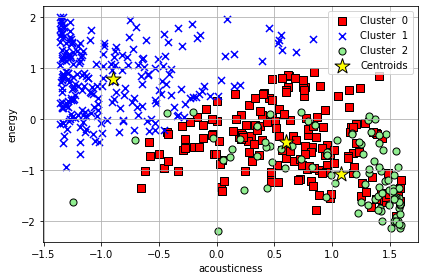

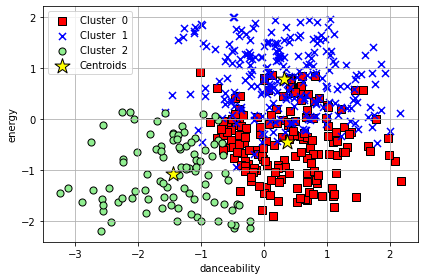

In [47]:
#Plot clusters. i,j = features to show
def plot_clusters(i, j):
    
    #from random import randint
    
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')

    #color = []
    #random.seed(30)
    #for i in range(n_clusters):
     #   color.append('#%06X' % randint(0, 0xFFFFFF))

    for k in range(km.n_clusters):
        plt.scatter(X_kmeans_std[y_km == k, i],
                    X_kmeans_std[y_km == k, j],
                    s = 50, c = colors[k],
                    marker = markers[k], edgecolor = 'black',
                    label = 'Cluster %2i' % k)

    plt.scatter(km.cluster_centers_[:, i],
                km.cluster_centers_[:, j],
                s = 250, marker = '*',
                c = 'yellow', edgecolor = 'black',
                label = 'Centroids')
    
    plt.legend(scatterpoints=1)
    plt.xlabel(X_kmeans.columns[i])
    plt.ylabel(X_kmeans.columns[j])
    plt.grid()
    plt.tight_layout()
    #plt.savefig('images/11_02.png', dpi=300)
    plt.show()


#Get plot_clusters for every combination of 2 features
def get_all_2d_draws():
    from itertools import combinations
    
    for i, j in combinations(np.arange(X_kmeans_std.shape[1]), 2): #X_kmeans_std.shape[1] = number of features
        plot_clusters(i, j)

get_all_2d_draws()


In [35]:
print('Distortion: %.2f' % km.inertia_)

Distortion: 604.53


In [36]:
elbow graphic
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
    km.fit(X_kmeans_std)
    distortions.append(km.inertia_)
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
#plt.savefig('images/11_03.png', dpi=300)
plt.show()

SyntaxError: invalid syntax (<ipython-input-36-33049e4876df>, line 1)

In [37]:
X_kmeans_std.shape

(500, 3)

In [40]:
np.unique(y_km)

array([0, 1, 2])

SyntaxError: invalid syntax (<ipython-input-3-9eb8a3769bec>, line 1)